## Final Project Submission
Please fill out:

* Student name: Claudia Sagini
* Student pace: full time
* Scheduled project review date/time:
* Instructor name: Asha Deen


# LOAN DEFAULT PREDICTION ANALYSIS
---

![Loan Default Image](images/istockphoto-1145371340-612x612.jpeg)


## Business Overview:
---
In this endeavor, we aim to address the critical challenges faced by financial institutions, such as banks and credit unions, in managing loan portfolios and mitigating risks associated with loan defaults. Lending institutions play a vital role in the economy by providing financial support to individuals and businesses. However, the occurrence of loan defaults can significantly impact their financial health and stability. Therefore, accurately predicting loan defaults is crucial for these institutions to make informed decisions and safeguard their interests.

## Business Problem:
---
The primary challenge faced by financial institutions is the accurate prediction of loan defaults. Loan defaults occur when borrowers fail to repay their loans as per the agreed-upon terms, resulting in financial losses for lenders. Predicting loan defaults enables lenders to assess the creditworthiness of loan applicants and make informed decisions about loan approvals. By identifying high-risk borrowers in advance, lenders can minimize their exposure to default risk, optimize their loan portfolios, and maintain financial stability. Therefore, developing a reliable predictive model for loan defaults is essential for lenders to manage risk effectively and ensure the sustainability of their operations.

## Objectives
---
* Develop a machine learning model to predict loan defaults.
* Identify key features that influence loan repayment behavior.
* Evaluate the performance of the model using relevant metrics.
* Implement the model in the institution's loan approval process to reduce financial risk.

## Data Understanding:
---
- To address the business problem of loan default prediction, we will leverage a comprehensive loan default prediction dataset. This dataset contains a wealth of information about loan applicants, including their demographic details, financial characteristics, loan details, and repayment history.
- The dataset includes features such as `age`, `education level`, `debt-to-income ratio`, `credit score`, `loan amount`, `loan term`, `interest rate`, and `loan default indicator (0 - paid in full, 1 - defaulted)`.
- By analyzing these features, we can gain insights into the factors influencing loan default behavior and develop predictive models to forecast loan defaults accurately.



## 1. Import Libraries
---
In this project, we import all necessary libraries for data manipulation, visualization, and modeling. This may include `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, etc.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Libraries for scale the data 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Algorithim to use
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# Libraries for evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, precision_recall_curve, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

# library for model tuning
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_theme(style = "darkgrid")

## 2. Load the Data
---
Load the loan default dataset into a pandas DataFrame for further analysis. Explore the structure of the dataset, including the features and the target variable.

#### 2.1 Create a clas to load the data

In [3]:
class DataLoading:    
    def data_loading(self, data):
        # Load the data
        load = pd.read_csv(data)
        return load

    # View the first five rows and columns of the data
    def get_rc(self, load):
        return load
        
    # Get the info of the data
    def get_info(self, load):
        return load.info()
    
    # Get the shape of the data
    def get_shape(self, load):
        return load.shape
    
    # View the columns of the data
    def get_columns(self, load):
        return load.columns
    
    # Summary statistics of the data
    def get_description(self, load):
        return load.describe()
    
    # Check for null values
    def get_null_values(self, load):
        return load.isnull().sum()

#### 2.2 Instatiate DataLoading class

In [4]:
loader = DataLoading()

# Load the data
file = 'Loan_default.csv'
data = loader.data_loading(file)


#### 2.3 Get the first five rows and columns of the data

In [5]:
loan_df = loader.get_rc(data)

# Print the result
print("First five rows and columns of the data:")
loan_df

First five rows and columns of the data:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


#### 2.4 Info of the data

In [6]:
info = loader.get_info(data)

info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

The dataset is a mixed-type dataset, consisting of:
* Numerical variables $int64$: `Age`, `Income`, `LoanAmount`, `CreditScore`, etc.
* Categorical variables $object$: `Education`, `EmploymentType`, `MaritalStatus`, etc.
* Binary variables $float64$: `HasMortgage`, `HasDependents`, `HasCoSigner`, `Default`
* Unique identifier: `LoanID`

#### 2.5 Explore the shape of the data

In [7]:
shape = loader.get_shape(data)
print("Shape of the data: ", shape)

Shape of the data:  (255347, 18)


**This dataset contains 255347 rows and 18 columns**

#### 2.6 Columns

In [8]:
column = loader.get_columns(data)
print("Columns:\n", column)

Columns:
 Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


**We now the names of the data features**

#### 2.7 Analysing numerical data

In [9]:
desc = loader.get_description(data)
print("Summary Statistics:")
desc

Summary Statistics:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


#### 2.8 Check for null values

In [10]:
check_null = loader.get_null_values(data)
print("Null values:")
check_null

Null values:


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

**There are no missing values or missing data**

## 3. Exploratory Data Analysis(EDA)
---
Here, we'll perform exploratory data analysis to gain insights into the dataset. This may include summary statistics, data visualization, and identifying any patterns or trends. Explore the distribution of each feature, examine correlations, and identify potential outliers.

We'll create a class `EDA` that:
- Checks the disrtibution of numerical features.
- Checks the target count.
- Performs univariate and bivariate analysis and plots them..

In [11]:
class EDA:
    """This class will perform Exploratory Data Analysis on the loan prediction data.
    It will perfom univariate analysis, bivariate analysis and multivariate analysis.
    Plots will be seen to show the distribution of the data.
    """
    def __init__(self, data):
        self.data = data
        self.numerical_features = ['Age', 'Income', 'LoanAmount', 'InterestRate', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'LoanTerm']
        self.categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'LoanPurpose']

    def target_variable_count(self):
        target_counts = self.data["Default"].value_counts()
        print('Target count:\n', target_counts)
        print("-----------------------")
        print(f"From the output above, we observe that the target variable 'Default' comprises {target_counts[0]} instances of non-default (0) and {target_counts[1]} instances of default (1). This indicates that approximately {target_counts[1]} people in the dataset have defaulted on their loans.")

    def check_data_distribution(self):
        print("Numerical Distribution:")
        self.data[self.numerical_features].hist(figsize=(22, 20))
        plt.show();

    def univariate_analysis(self):
        print("Unavariate Analysis:")
        for column in self.data.columns:
            if column in self.numerical_features:
                plt.figure(figsize=(8, 4))
                sns.histplot(data=self.data, x=column, kde=True)
                plt.title(f'Distribution of {column}')
                plt.show();
            elif column in self.categorical_features:
                plt.figure(figsize=(8, 4))
                sns.countplot(data=self.data, x=column)
                plt.title(f'Distribution of {column}')
                plt.xticks(rotation=45)
                plt.show();
    def bivariate_analysis(self):
        for feature in self.data.columns:
            if feature != "Default":
                if feature in self.numerical_features:
                    plt.figure(figsize=(10, 6))
                    sns.boxplot(data=self.data, x='Default', y=feature)
                    plt.title(f'Relationship between {feature} and Default')
                    plt.xlabel('Default')
                    plt.ylabel(feature)
                    plt.show();
                elif feature in self.categorical_features:
                    plt.figure(figsize=(10, 6))
                    sns.countplot(data=self.data, x=feature, hue='Default')
                    plt.title(f'Relationship between {feature} and Default')
                    plt.xlabel(feature)
                    plt.ylabel('Count')
                    plt.legend(title='Default', loc='upper right')
                    plt.xticks(rotation=45)
                    plt.show();

    def multivariate_analysis(self):
        print("Multivariate Analysis:")
        plt.figure(figsize=(12, 8))
        corr_matrix = self.data.corr()
        corr_heatmap = sns.heatmap(corr_matrix, cmap="Reds", annot=True, annot_kws={"size": 14})
        plt.show();

In [12]:
# Initializa the class
eda = EDA(loan_df)

In [13]:
target_count = eda.target_variable_count()

Target count:
 0    225694
1     29653
Name: Default, dtype: int64
-----------------------
From the output above, we observe that the target variable 'Default' comprises 225694 instances of non-default (0) and 29653 instances of default (1). This indicates that approximately 29653 people in the dataset have defaulted on their loans.


Numerical Distribution:


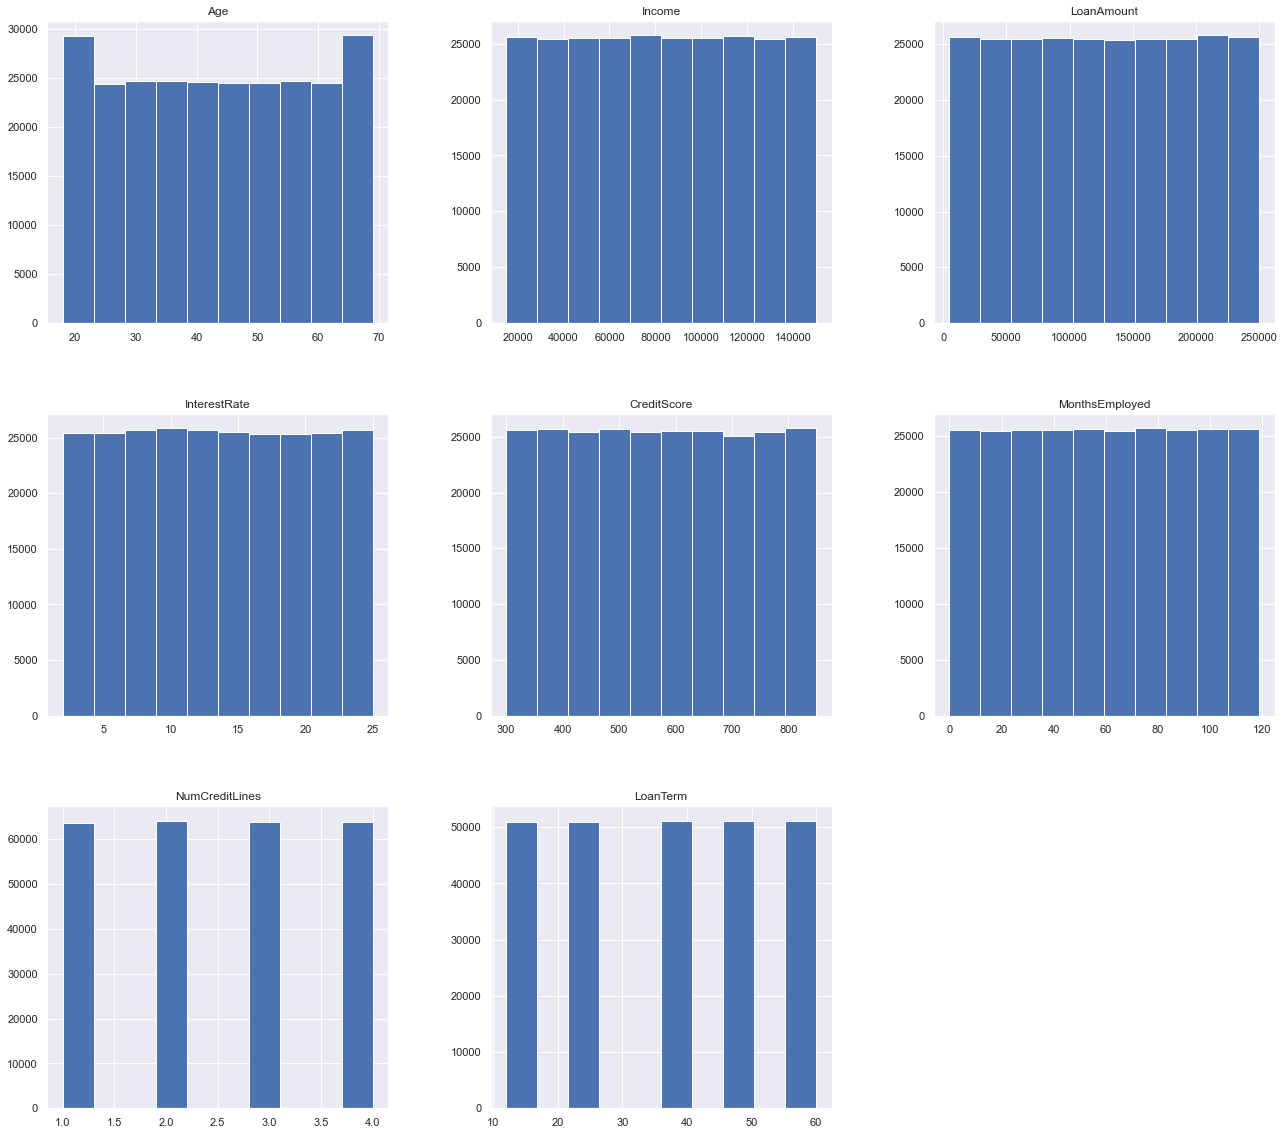

In [14]:
num_distribution = eda.check_data_distribution()
num_distribution

Unavariate Analysis:


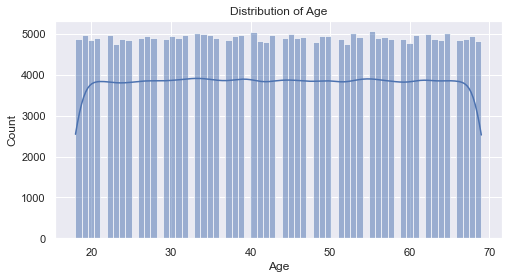

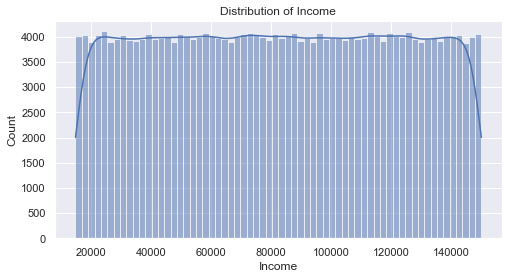

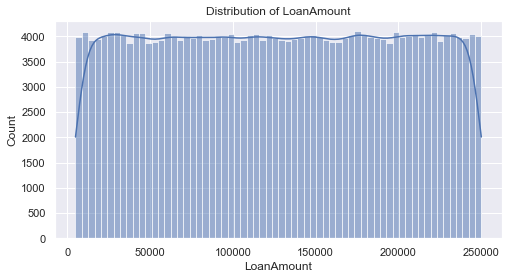

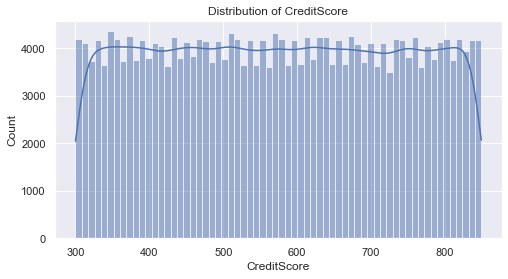

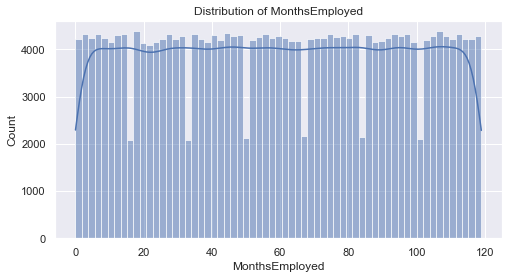

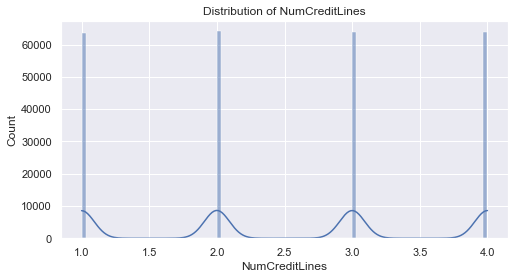

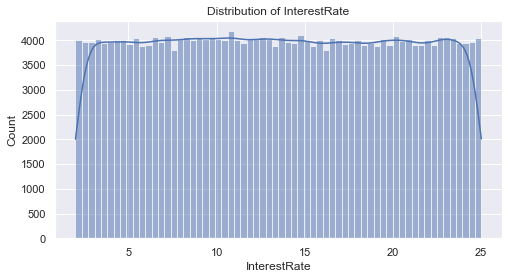

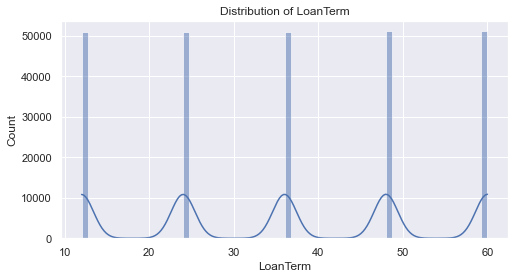

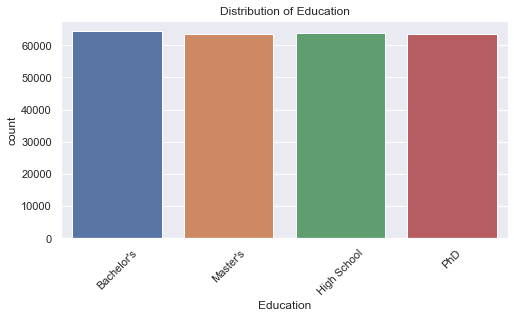

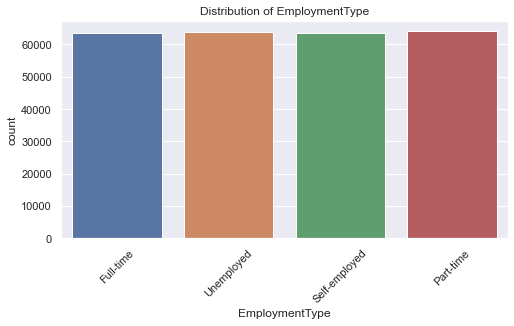

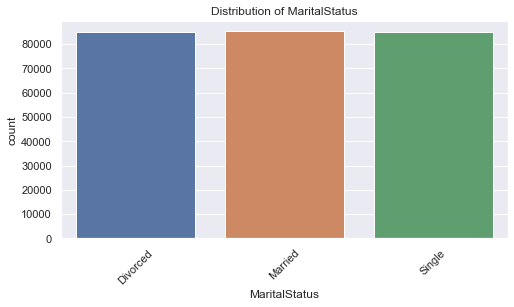

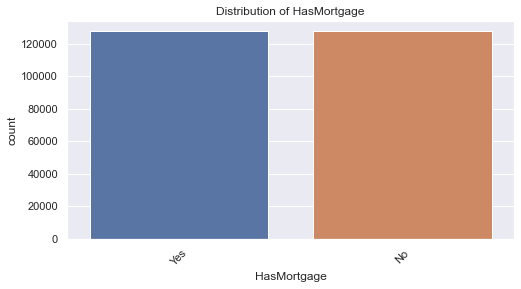

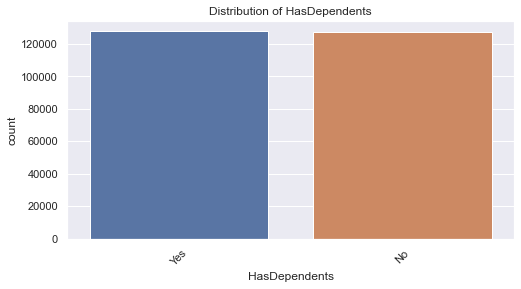

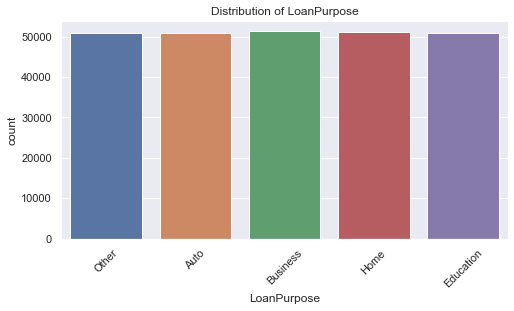

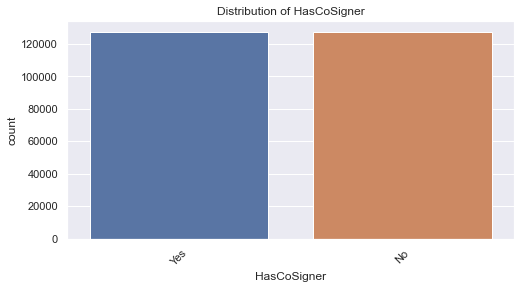

In [15]:
univar = eda.univariate_analysis()
univar

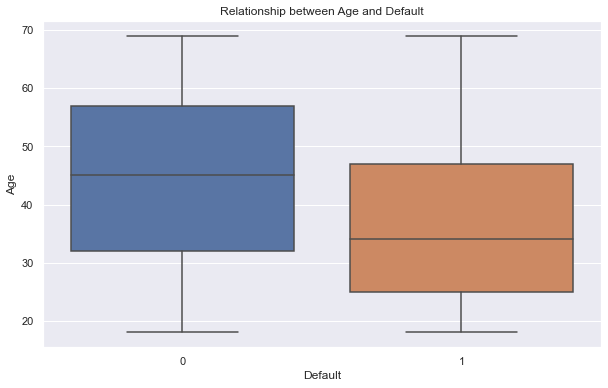

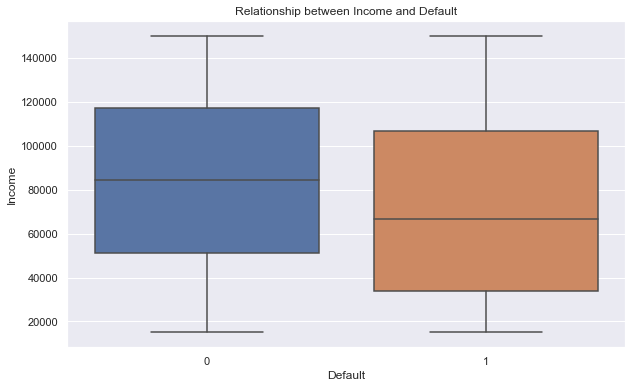

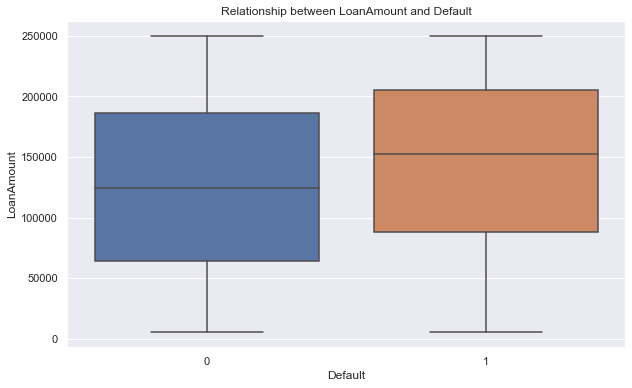

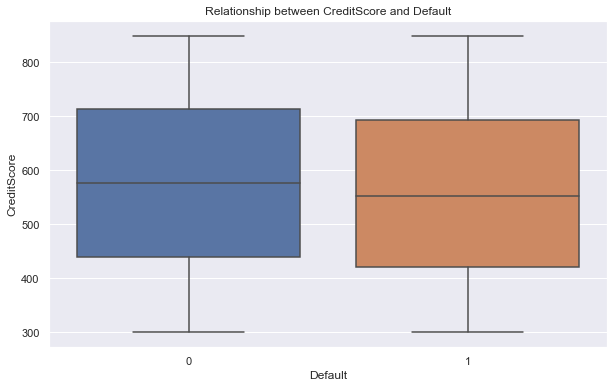

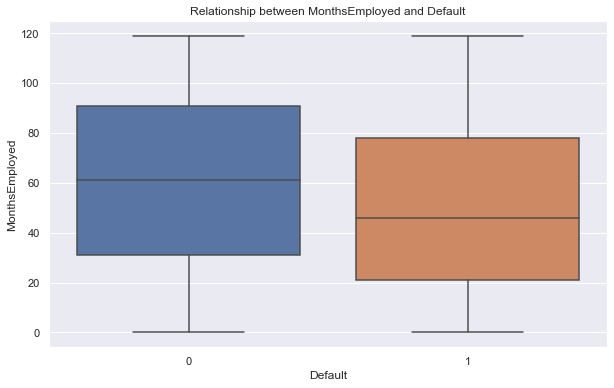

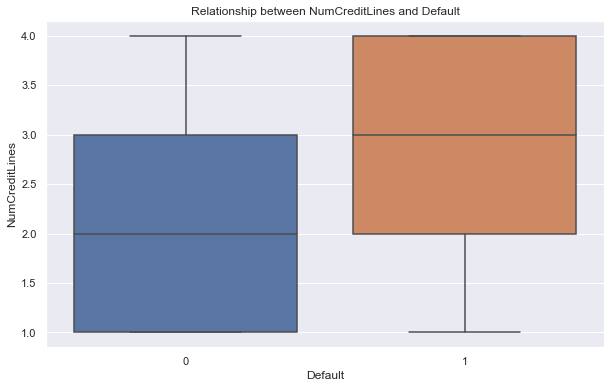

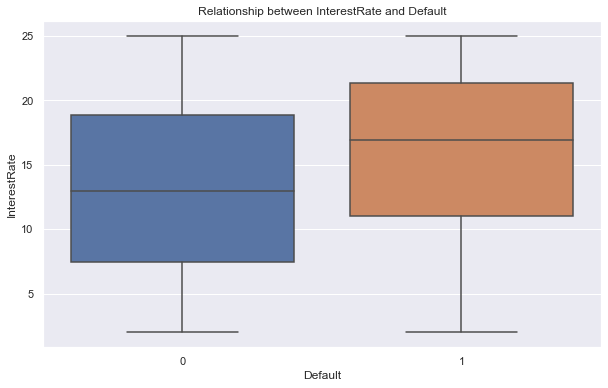

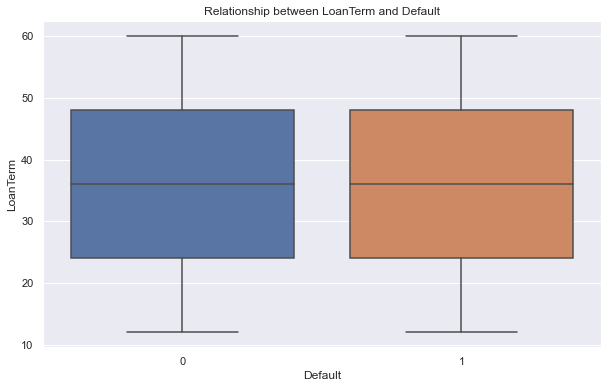

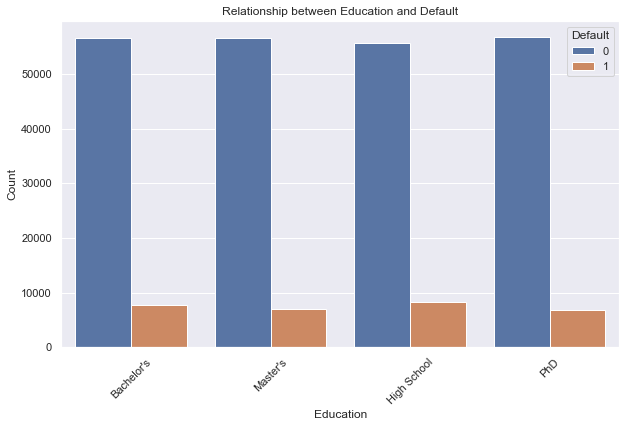

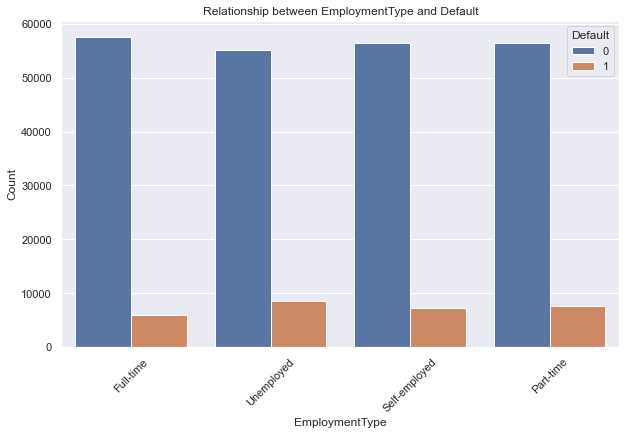

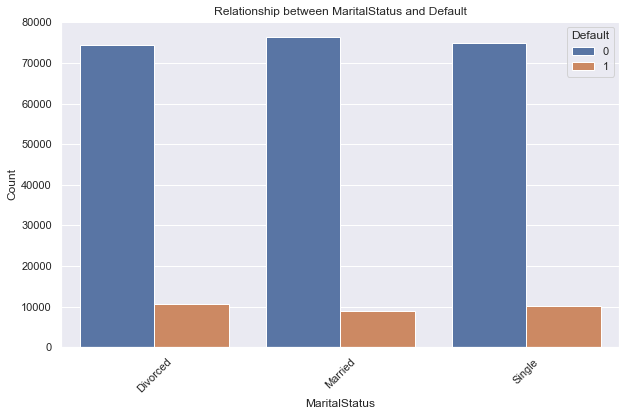

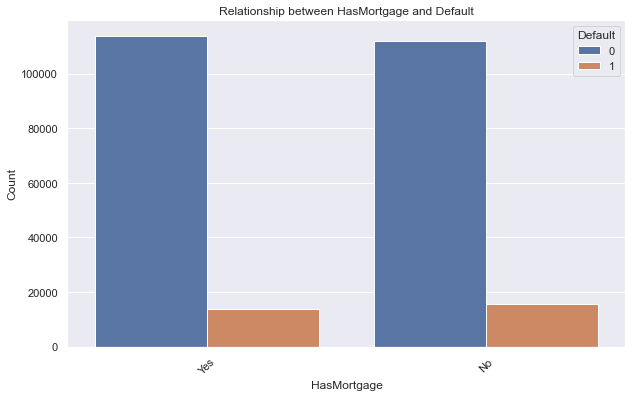

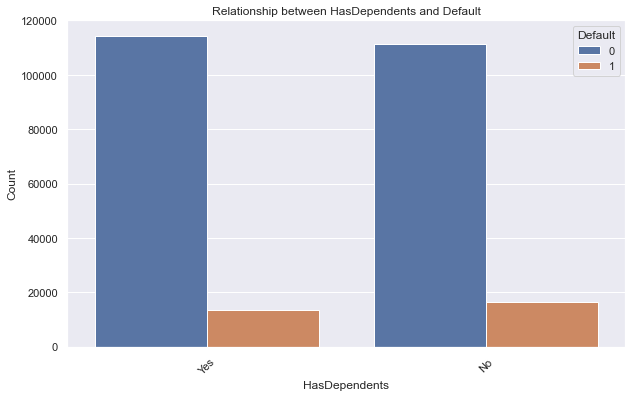

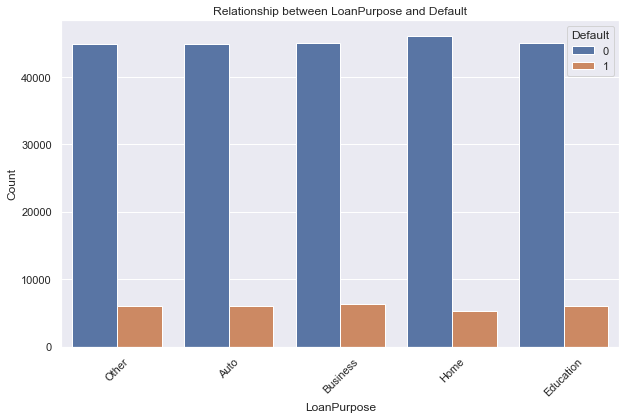

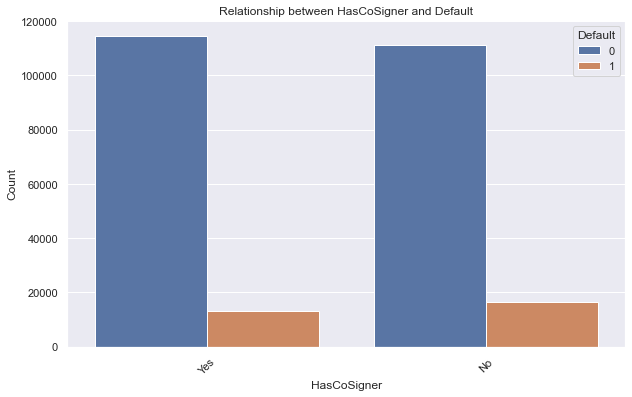

In [16]:
bivar = eda.bivariate_analysis()
bivar

Multivariate Analysis:


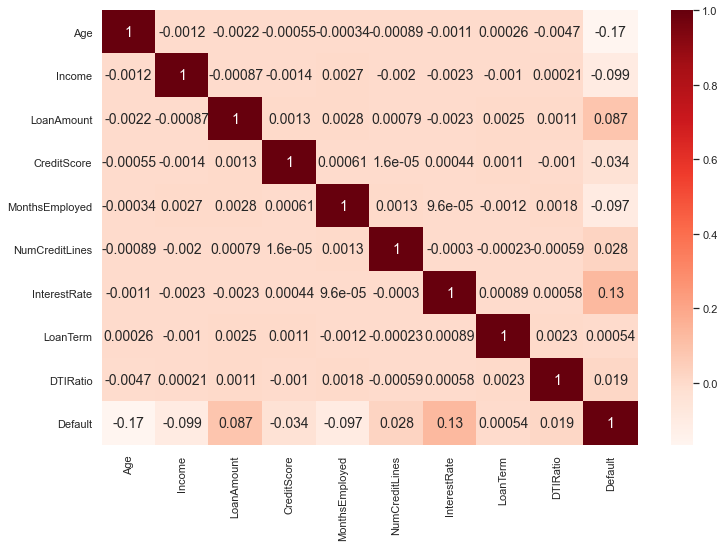

In [17]:
multivar = eda.multivariate_analysis()
multivar

### SHORT SUMMARY OF EDA
---
Based on the plots from EDA heres' how we can analyse our `loan_df` dataset:

**1. Univariate Analysis:** The numerical features such as `Age`, `Income` are evenly distributed.

**2. Bivariate Analysis:** From the numerical features we can see that the boxplots show no outliers.The categorical features are evenly distributed.

**3. Multivariate Analysis:** 
Based on the provided correlation matrix:

- **Highest correlation** value is between `Income` and `MonthsEmployed` with a correlation coefficient of `0.003`.

- **Lowest correlation** value is between `Age` and `Income` with a correlation coefficient of `-0.001`.

- **Highest positive correlation** with the target variable `Default` is `InterestRate`, with a correlation coefficient of `0.131`. This indicates that as the interest rate increases, the likelihood of default also increases. 

- **Highest negative correlation** with the target variable (Default) is `Age`, with a correlation coefficient of `-0.168`. This suggests that as age increases, the likelihood of default decreases, and vice versa.


##### Overally we will consider `InterestRate` as the feature to consider predicting loan defaults.

## 4. Data Preprocessing
---
Clean the data by handling missing values, encoding categorical variables, and scaling numerical features. Apply appropriate techniques to address any data inconsistencies or anomalies:

**1. Encoding categorical variables.**
* This step is crucial when dealing with categorical variables because most machine learning algorithms require numerical input. Encoding categorical variables ensures that the model can interpret and learn from these features effectively.

**2. Split data**
* After encoding the categorical variables, the next step is to split the data into training and testing sets. This allows us to train the model on one subset of the data and evaluate its performance on another, ensuring that the model generalizes well to unseen data.

**3. Apply smote**
* Synthetic Minority Over-sampling Technique (SMOTE) is applied to address class imbalance in the dataset. SMOTE generates synthetic samples for the minority class to balance the dataset.

#### 4.1 Creating a class that performs all the above tasks

In [18]:
class DataPreparation:
    def __init__(self, target, categorical_features):
        self.target = target
        self.categorical_features = categorical_features
        self.encoder = LabelEncoder()
        
    # Encode the target variable   
    def encoding(self, data):
        data[self.target] = self.encoder.fit_transform(data[self.target])

        # One-hot encode categorical variables
        
        data_encoded = pd.get_dummies(data, columns=self.categorical_features)
        return data_encoded
    
    # Split data
    def split_data(self, data):
        X = data.drop(self.target, axis=1)
        y = data[self.target]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test
    
    
    # Apply SMOTE
    def apply_smote(self, X_train, y_train):
        smote = SMOTE(random_state=42)
        
        X_res, y_res = smote.fit_resample(X_train, y_train)
        return X_res, y_res
    
    
    
    # Prepare data
    def prepare_data(self, data):
        data_encoded = self.encoding(data)
        
        data_encoded = data_encoded.select_dtypes(include=[np.number])
        
        X_train, X_test, y_train, y_test = self.split_data(data_encoded)
        X_res, y_res = self.apply_smote(X_train, y_train)

        return X_res, X_test, y_res, y_test


target = 'Default'
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'LoanPurpose']

##### 4.2 Initialize the DataPreparation class

In [19]:
data_prep = DataPreparation(target, categorical_features)

#### 4.3 Encode the target variable

In [20]:
loan_df_encoded = data_prep.encoding(loan_df)
loan_df_encoded.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,HasCoSigner_No,HasCoSigner_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,1,0,1,0,1,0,0,0,0,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0,1,0,0,1,0,0,0,0,1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,1,0,1,1,0,1,0,0,0,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,1,0,1,0,0,1,0,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0,0,1,1,0,1,0,0,0,0


In [21]:
loan_df_encoded.shape

(255347, 33)

In [22]:
loan_df_encoded.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Default', 'Education_Bachelor's', 'Education_High School',
       'Education_Master's', 'Education_PhD', 'EmploymentType_Full-time',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'HasMortgage_No',
       'HasMortgage_Yes', 'HasDependents_No', 'HasDependents_Yes',
       'HasCoSigner_No', 'HasCoSigner_Yes', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other'],
      dtype='object')

#### 4.4 Apply the split method

In [23]:
loan_df_encoded = loan_df_encoded.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = data_prep.split_data(loan_df_encoded)

print("Split Data:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Split Data:
X_train shape: (204277, 31)
X_test shape: (51070, 31)
y_train shape: (204277,)
y_test shape: (51070,)


#### 4.5 Apply SMOTE

In [24]:
X_res, y_res = data_prep.apply_smote(X_train, y_train)
print("After SMOTE:")
print("X_res shape:", X_res.shape)
print("y_res shape:", y_res.shape)

After SMOTE:
X_res shape: (361048, 31)
y_res shape: (361048,)


#### 4.6 Prepare the data

In [25]:
X_res, X_test, y_res, y_test = data_prep.prepare_data(loan_df)
print("Using prepare_data method:")
print("X_train shape:", X_res.shape)
print("X_test shape:", X_test.shape)
print("y_res shape:", y_res.shape)
print("y_test shape:", y_test.shape)

Using prepare_data method:
X_train shape: (361048, 31)
X_test shape: (51070, 31)
y_res shape: (361048,)
y_test shape: (51070,)


## 5. Data Modeling
---
In this section, we're transitioning from data exploration and preprocessing to constructing predictive models for loan default prediction. The goal here is to train machine learning algorithms that can accurately predict whether a loan applicant is likely to default on their loan.

### Why Data Modeling?
**1. Prediction:** By building predictive models, we aim to forecast loan defaults based on historical data patterns. This predictive capability enables financial institutions to anticipate and mitigate potential risks associated with lending.

**2. Risk Management:** Accurate prediction of loan defaults allows financial institutions to better manage their loan portfolios, identify high-risk borrowers, and implement strategies to minimize potential losses.

**3.Decision Support:** Predictive models serve as decision support tools for lenders, assisting them in making informed decisions regarding loan approvals, interest rates, and terms based on the creditworthiness of applicants.

In [26]:
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [27]:
# Define EvaluationMetrics class
class EvaluationMetrics:
    def find_best_threshold(y_test, y_pred_proba):
        """Find the best threshold based on F1 score."""
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
        f1_scores = 2 * (precision * recall) / (precision + recall)
        best_threshold_index = np.argmax(f1_scores)
        best_threshold = thresholds[best_threshold_index]
        return best_threshold

    def classify(y_pred_proba, threshold):
        """Classify instances based on the best threshold."""
        return (y_pred_proba >= threshold).astype(int)

    def evaluate_model(y_test, y_pred, model_name):
        """Evaluate the model performance."""
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        print(f"Evaluation Metrics for {model_name}:")
        print(f"Precision: {round(precision * 100, 4)}%")
        print(f"Recall: {round(recall * 100, 4)}%")
        print(f"F1-Score: {round(f1 * 100, 4)}%")
        print(f"Accuracy: {round(accuracy * 100, 4)}%")
        print(f"AUC Score: {round(roc_auc * 100, 4)}%")
        print("---------------------------------------")
        
    def plot_precision_recall_vs_threshold(y_test, y_pred_proba):
        """Plot precision and recall against thresholds."""
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
        plt.figure(figsize=(10, 7))
        plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
        plt.plot(thresholds, recall[:-1], 'g--', label='Recall')
        plt.xlabel('Threshold')
        plt.legend(loc='upper left')
        plt.ylim([0, 1])
        plt.title('Precision and Recall vs Threshold')
        plt.grid(True)
        plt.show();
        
    

#### 5.1 Logistic Regression

In [28]:
class LogisticModel:
    def __init__(self):
        """Initialize the logistic regression model."""
        self.model = LogisticRegression(random_state=42)
    
    def fit_model(self, X_res, y_res):
        """Fit the logistic regression model."""
        self.model.fit(X_res, y_res)
    
    def predict_proba(self, X_test):
        """Predict probabilities for the test set."""
        return self.model.predict_proba(X_test)[:, 1]
    
    def evaluate(self, y_test, y_pred_proba):
        """Evaluate the logistic regression model."""
        best_threshold = EvaluationMetrics.find_best_threshold(y_test, y_pred_proba)
        y_pred = EvaluationMetrics.classify(y_pred_proba, best_threshold)
        EvaluationMetrics.evaluate_model(y_test, y_pred, "Logistic Regression")
        
    def visualize_evaluation(self, y_test, y_pred_proba):
        """Visualize evaluation metrics for logistic regression."""
        best_threshold = EvaluationMetrics.find_best_threshold(y_test, y_pred_proba)
        y_pred = EvaluationMetrics.classify(y_pred_proba, best_threshold)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.title('Confusion Matrix - Logistic Regression')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show();
        
        
    def visualize_threshold_curve(self, y_test, y_pred_proba):
        """Visualize precision and recall against thresholds."""
        EvaluationMetrics.plot_precision_recall_vs_threshold(y_test, y_pred_proba)

        
    def plot_roc_curve(self, y_test, y_pred_proba):
        """Plot ROC curve for logistic regression model."""
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - Logistic Regression')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show();
        
    def get_coefficients(self, X_train):
        """Get coefficients for logistic regression model."""
        coefficients = pd.DataFrame({"Feature": X_train.columns, "Coefficient": self.model.coef_[0]})
        coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
        return coefficients

In [29]:
# Initialize model
logistic_model = LogisticModel()

# Fit model
logistic_model.fit_model(X_res, y_res)

In [30]:
# Get predicted probabilities
y_pred_proba_logistic = logistic_model.predict_proba(X_test)
y_pred_proba_logistic

array([0.29571329, 0.2501547 , 0.38549257, ..., 0.4712375 , 0.63040028,
       0.13910395])

In [31]:
# Evaluate the model
logistic_model.evaluate(y_test, y_pred_proba_logistic)

Evaluation Metrics for Logistic Regression:
Precision: 26.2425%
Recall: 46.0%
F1-Score: 33.4195%
Accuracy: 78.8251%
AUC Score: 64.5563%
---------------------------------------


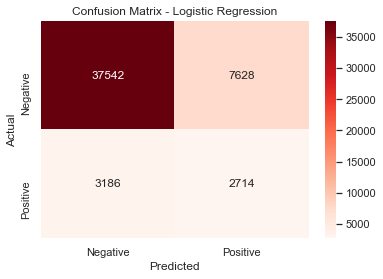

In [32]:
# visualize evaluation metrics
logistic_model.visualize_evaluation(y_test, y_pred_proba_logistic)

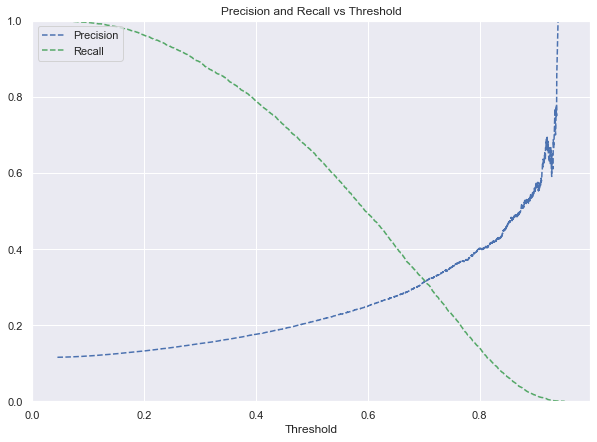

In [33]:
# Visualize the precision-recall curve against thresholds
logistic_model.visualize_threshold_curve(y_test, y_pred_proba_logistic)

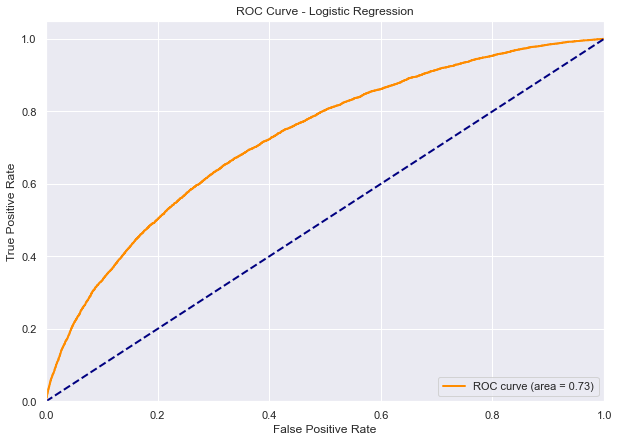

In [34]:
# Plot ROC curve
logistic_model.plot_roc_curve(y_test, y_pred_proba_logistic)

In [35]:
# Get coefficients
coefficients = logistic_model.get_coefficients(X_res)
coefficients

,Feature,Coefficient
6,InterestRate,0.082279
7,LoanTerm,0.017837
8,DTIRatio,0.001183
3,CreditScore,0.000026
2,LoanAmount,0.000005
1,Income,-0.000006
5,NumCreditLines,-0.001600
16,EmploymentType_Unemployed,-0.003011
24,HasCoSigner_No,-0.003032
27,LoanPurpose_Business,-0.003082


#### 5.2 Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

class RandomForestModel:
    def __init__(self):
        """Initialize the random forest model."""
        self.model = None
    
    def fit_model(self, X_res, y_res, **kwargs):
        """Fit the random forest model."""
        self.model = RandomForestClassifier(**kwargs)
        self.model.fit(X_res, y_res)
    
    def predict_proba(self, X_test):
        """Predict probabilities for the test set."""
        if self.model is not None:
            return self.model.predict_proba(X_test)[:, 1]
        else:
            raise ValueError("Model has not been fitted yet.")
    
    def evaluate(self, y_test, y_pred_proba):
        """Evaluate the Random Forest model."""
        best_threshold = EvaluationMetrics.find_best_threshold(y_test, y_pred_proba)
        y_pred = EvaluationMetrics.classify(y_pred_proba, best_threshold)
        EvaluationMetrics.evaluate_model(y_test, y_pred, "Random Forest")
        
    def visualize_evaluation(self, y_test, y_pred_proba):
        """Visualize evaluation metrics for Random Forest."""
        best_threshold = EvaluationMetrics.find_best_threshold(y_test, y_pred_proba)
        y_pred = EvaluationMetrics.classify(y_pred_proba, best_threshold)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.title('Confusion Matrix - Random Forest')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show();
        
    def visualize_threshold_curve(self, y_test, y_pred_proba):
        """Visualize the precision-recall curve against thresholds for Random Forest."""
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
        plt.figure(figsize=(10, 7))
        if len(thresholds) > 1:
            plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
            plt.plot(thresholds, recall[:-1], 'g--', label='Recall')
            plt.xlabel('Threshold')
            plt.legend(loc='upper left')
            plt.ylim([0, 1])
            plt.title('Precision and Recall vs Threshold - Random Forest')
            plt.grid(True)
            plt.show()
        else:
            print("Not enough threshold values to plot")
            
    def plot_roc_curve(self, y_test, y_pred_proba):
        """Plot ROC curve for Random Forest model."""
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - Random Forest')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show();
        
    def plot_feature_importances(self, X_train):
        """Plot feature importances for Random Forest model."""
        importances = self.model.feature_importances_

     # Plot feature importance for Random Forest
        sorted_indices_rfc = np.argsort(importances)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_indices_rfc)), importances[sorted_indices_rfc], align='center')
        plt.yticks(range(len(sorted_indices_rfc)), [X_train.columns[i] for i in sorted_indices_rfc])
        plt.title('Random Forest Feature Importances')
        plt.show()


In [89]:
# Initialize model
rf_model = RandomForestModel()

# Fit model
rf_model.fit_model(X_res, y_res)

In [90]:
# Get predicted probabilities
y_pred_proba_rf = rf_model.predict_proba(X_test)
y_pred_proba_rf

array([0.02, 0.04, 0.11, ..., 0.14, 0.09, 0.05])

In [91]:
# Evaluate the model
rf_model.evaluate(y_test, y_pred_proba_rf)


Evaluation Metrics for Random Forest:
Precision: 26.7082%
Recall: 45.7797%
F1-Score: 33.7351%
Accuracy: 79.2226%
AUC Score: 64.6853%
---------------------------------------


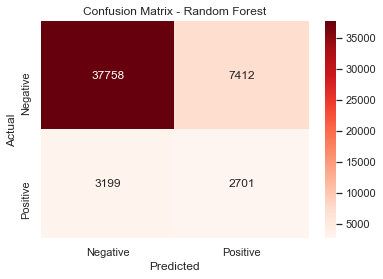

In [92]:
# Visualize the confusion matrix
rf_model.visualize_evaluation(y_test, y_pred_proba_rf)

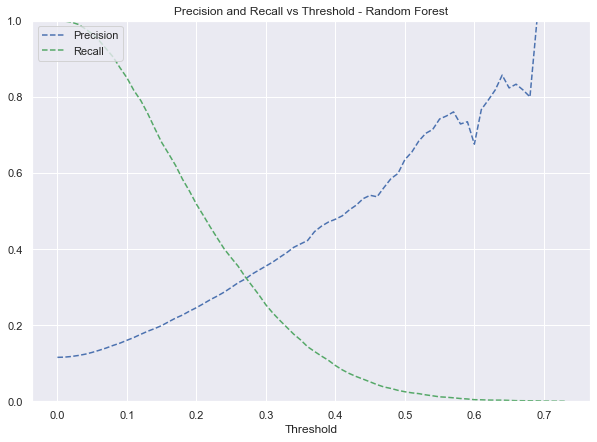

In [93]:
# Visualize the threshold curve
rf_model.visualize_threshold_curve(y_test, y_pred_proba_rf)

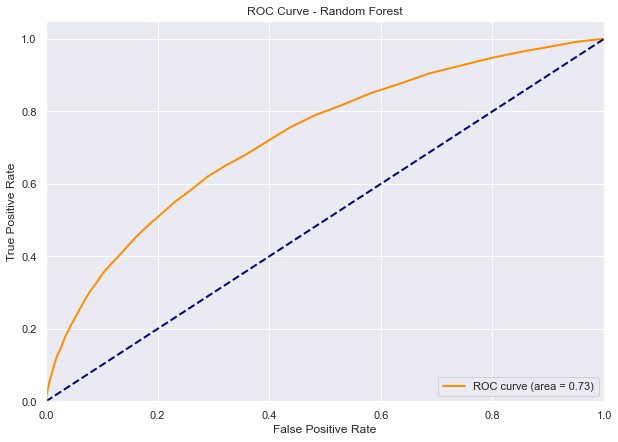

In [94]:
# Plot ROC curve
rf_model.plot_roc_curve(y_test, y_pred_proba_rf)

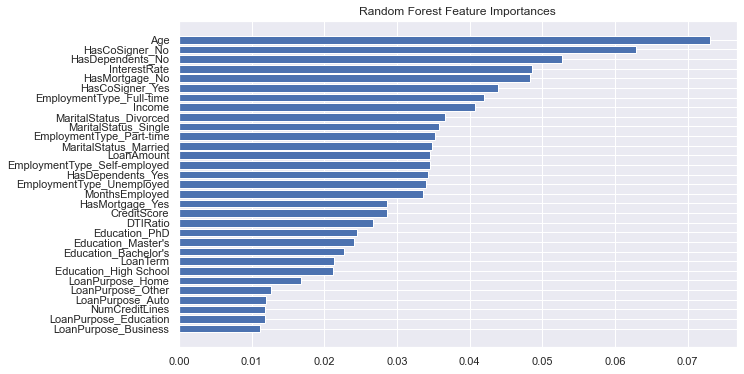

In [95]:
# Plot feature importances
rf_model.plot_feature_importances(X_res)

#### 5.3 Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

class DecisionTreeModel:
    def __init__(self):
        """Initialize the Decision Tree model."""
        self.model = None
    
    def fit_model(self, X_res, y_res, **kwargs):
        """Fit the Decision Tree model."""
        self.model = DecisionTreeClassifier(**kwargs)
        self.model.fit(X_res, y_res)
    
    def predict_proba(self, X_test):
        """Predict probabilities for the test set."""
        if self.model is not None:
            return self.model.predict_proba(X_test)[:, 1]
        else:
            raise ValueError("Model has not been fitted yet.")

    
    def evaluate(self, y_test, y_pred_proba):
        """Evaluate the Decision Tree model."""
        best_threshold = EvaluationMetrics.find_best_threshold(y_test, y_pred_proba)
        y_pred = EvaluationMetrics.classify(y_pred_proba, best_threshold)
        EvaluationMetrics.evaluate_model(y_test, y_pred, "Decision Tree")
        
    def visualize_evaluation(self, y_test, y_pred_proba):
        """Visualize evaluation metrics for Decision Tree."""
        best_threshold = EvaluationMetrics.find_best_threshold(y_test, y_pred_proba)
        y_pred = EvaluationMetrics.classify(y_pred_proba, best_threshold)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.title('Confusion Matrix - Decision Tree')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show();
        
    def visualize_threshold_curve(self, y_test, y_pred_proba):
        """Visualize the precision-recall curve against thresholds for Decision Tree."""
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
        plt.figure(figsize=(10, 7))
        if len(thresholds) > 1:
            plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
            plt.plot(thresholds, recall[:-1], 'g--', label='Recall')
            plt.xlabel('Threshold')
            plt.legend(loc='upper left')
            plt.ylim([0, 1])
            plt.title('Precision and Recall vs Threshold - Decision Tree')
            plt.grid(True)
            plt.show()
        else:
            print("Not enough threshold values to plot")

            
    def plot_roc_curve(self, y_test, y_pred_proba):
        """Plot ROC curve for Decision Tree model."""
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - Decision Tree')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show();
        
    def plot_feature_importances(self, X_train):
        """Plot feature importances for Decision Tree model."""
        importances = self.model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(12, 8))
        plt.title("Feature Importances - Decision Tree")
        plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
        plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.show();
        
    def plot_feature_importances(self, X_train):
        """Plot feature importances for Decision Tree model."""
        importances_dt = self.model.feature_importances_

        sorted_indices_dt = np.argsort(importances_dt)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_indices_dt)), importances_dt[sorted_indices_dt], align='center')
        plt.yticks(range(len(sorted_indices_dt)), [X_train.columns[i] for i in sorted_indices_dt])
        plt.title('Decision Tree Feature Importances')
        plt.show();        

In [73]:
# Initialize model
dt_model = DecisionTreeModel()

# Fit model
dt_model.fit_model(X_res, y_res)

In [74]:
# Get predicted probabilities
y_pred_proba_dt = dt_model.predict_proba(X_test)
y_pred_proba_dt

array([0., 0., 0., ..., 0., 0., 0.])

In [75]:
# Evaluate the model
dt_model.evaluate(y_test, y_pred_proba_dt)

Evaluation Metrics for Decision Tree:
Precision: 19.0758%
Recall: 24.0678%
F1-Score: 21.283%
Accuracy: 79.4322%
AUC Score: 55.3658%
---------------------------------------


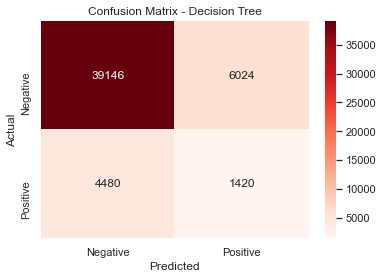

In [76]:
# Visualize the confusion matrix
dt_model.visualize_evaluation(y_test, y_pred_proba_dt)

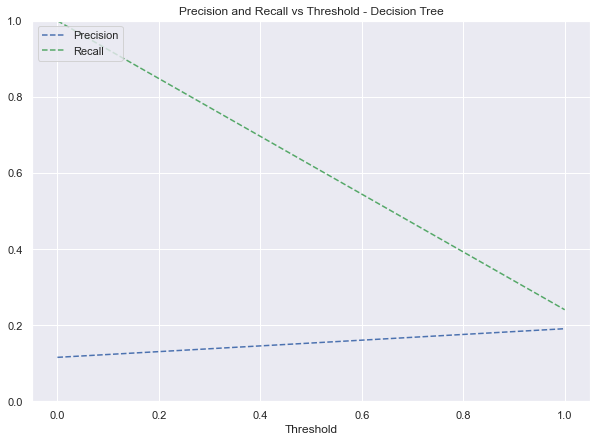

In [77]:
# Visualize the threshold curve
dt_model.visualize_threshold_curve(y_test, y_pred_proba_dt)

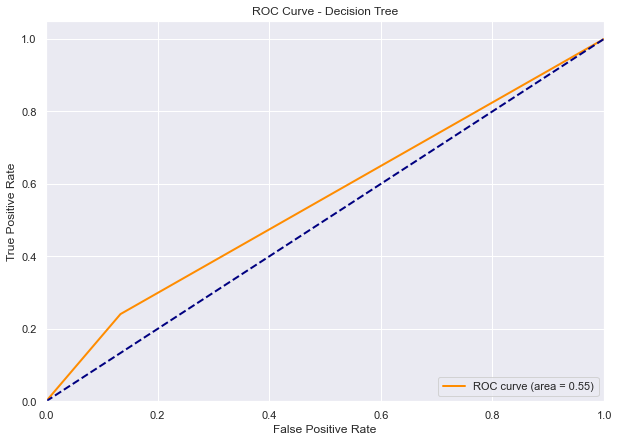

In [78]:
# Plot ROC curve
dt_model.plot_roc_curve(y_test, y_pred_proba_dt)

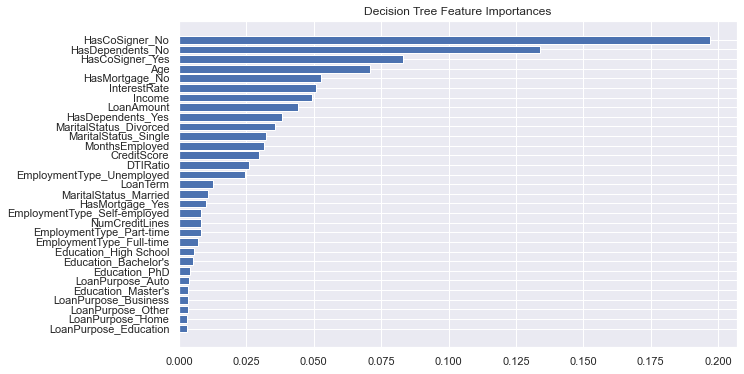

In [79]:
# Plot feature importances
dt_model.plot_feature_importances(X_res)

### Model Comparison

The results indicate that the Random Forest Classifier outperforms the other two models in terms of precision, recall, and F1-score. The Logistic Regression model has a relatively high accuracy and AUC-ROC score, but its precision and recall are lower than those of the Random Forest Classifier. The Decision Tree Classifier has a lower precision, recall, and F1-score compared to the other two models.

### Insights

Based on the evaluation results, we can draw several insights:

* **Random Forest outperforms Logistic Regression:** The Random Forest Classifier's ability to capture complex interactions between variables leads to better performance compared to the Logistic Regression model.

* **Decision Tree struggles with classification:** The Decision Tree Classifier's low precision and recall suggest that it may be prone to overfitting or underfitting, which can be addressed by tuning hyperparameters or using techniques like feature engineering.

* **Logistic Regression provides a conservative approach:** The Logistic Regression model's high accuracy and AUC-ROC score suggest that it may be a good choice for applications where high precision is not as critical, such as in situations where false positives are more acceptable.

* **Hyperparameter tuning is crucial:** The performance of the models can be improved by tuning hyperparameters, which can be achieved through techniques like grid search or random search.


## 6. Hyperparameter Tuning
---

We'll use a grid search approach to tune the hyperparameters. We'll create a grid of hyperparameter values and then evaluate each combination using 5-fold cross-validation.

#### 6.1 Decision Tree Tuning

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the base estimator
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with the base estimator and parameter grid
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_res, y_res)

# Get the best parameters
best_params = grid_search.best_params_

# Output the best parameters
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}


In [81]:
# Create and fit the DecisionTreeModel with the best parameters
best_dt_model = DecisionTreeModel()
best_dt_model.fit_model(X_res, y_res, **best_params)

# Predict probabilities for the test set
y_pred_proba_dt_tuned = best_dt_model.predict_proba(X_test)

In [82]:
# Evaluate the tuned model
best_dt_model.evaluate(y_test, y_pred_proba_dt_tuned)

Evaluation Metrics for Decision Tree:
Precision: 16.3704%
Recall: 55.8814%
F1-Score: 25.3226%
Accuracy: 61.9229%
AUC Score: 59.2967%
---------------------------------------


**Tuned Decision Tree:** The recall has significantly increased after tuning, indicating that the tuned model is better at identifying positive instances (loan defaults). However, there is a decrease in precision and F1-score, suggesting that the model may have become more liberal in classifying instances as positive, leading to more false positives. **

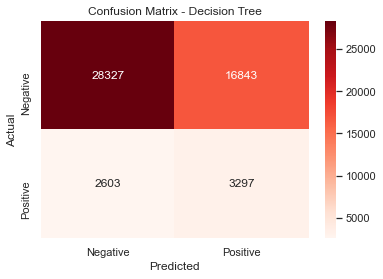

In [84]:
# Visualize the confusion matrix
dt_model.visualize_evaluation(y_test, y_pred_proba_dt_tuned)

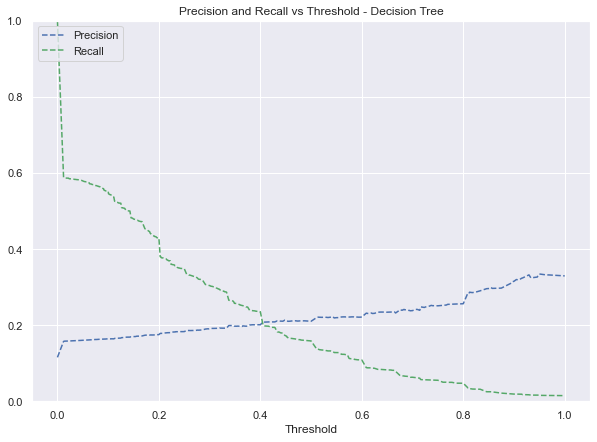

In [85]:
# Visualize the threshold curve
dt_model.visualize_threshold_curve(y_test, y_pred_proba_dt_tuned)


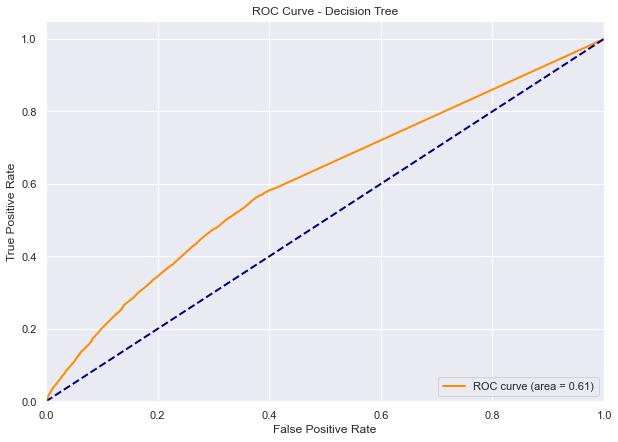

In [86]:
# Plot ROC curve
dt_model.plot_roc_curve(y_test, y_pred_proba_dt_tuned)


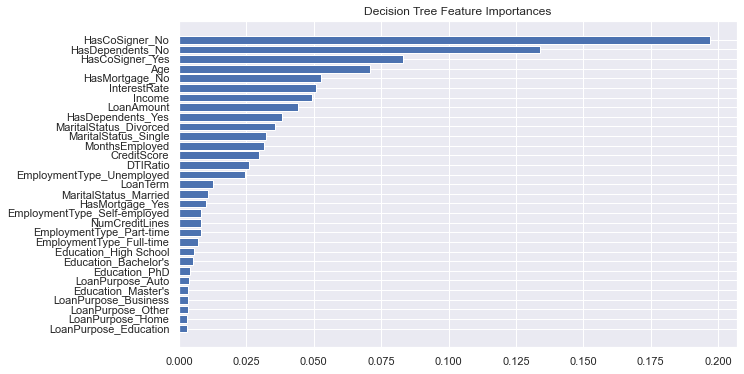

In [87]:
# Plot feature importances
dt_model.plot_feature_importances(X_res)

In [96]:
# Create and fit the RandomForestModel with the best parameters
best_rf_model = RandomForestModel()
best_rf_model.fit_model(X_res, y_res, **best_params)

# Predict probabilities for the test set
y_pred_proba_rf_tuned = best_rf_model.predict_proba(X_test)


In [97]:
# Evaluate the tuned model
best_rf_model.evaluate(y_test, y_pred_proba_rf_tuned)

Evaluation Metrics for Random Forest:
Precision: 28.386%
Recall: 46.322%
F1-Score: 35.2009%
Accuracy: 80.2976%
AUC Score: 65.5287%
---------------------------------------


**Tuned Random Forest:** The precision, recall, and F1-score have all improved after tuning, indicating that the tuned Random Forest model performs better in terms of both precision and recall compared to its untuned version. Additionally, there is a slight increase in accuracy and AUC score, further demonstrating the effectiveness of hyperparameter tuning.



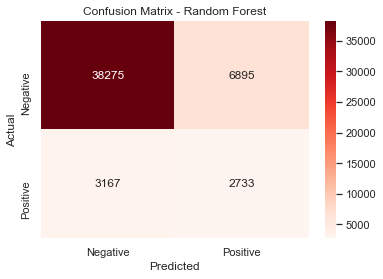

In [98]:
# Visualize the confusion matrix
rf_model.visualize_evaluation(y_test, y_pred_proba_rf_tuned)

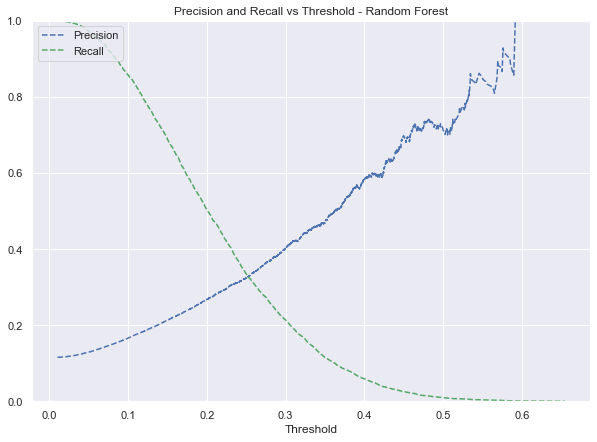

In [99]:
# Visualize the threshold curve
rf_model.visualize_threshold_curve(y_test, y_pred_proba_rf_tuned)


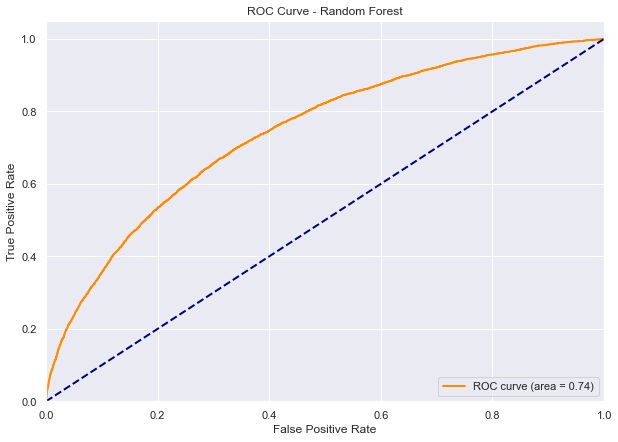

In [100]:
# Plot ROC curve
rf_model.plot_roc_curve(y_test, y_pred_proba_rf_tuned)

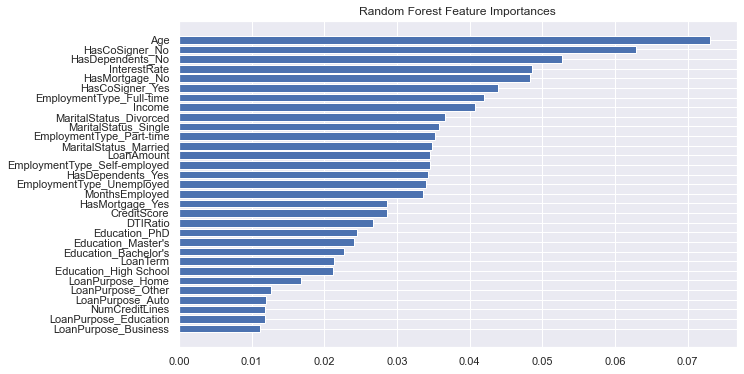

In [101]:
# Plot feature importances
rf_model.plot_feature_importances(X_res)

**Overall, the Random Forest model still outperforms the Decision Tree model after hyperparameter tuning, making it the preferred choice for predicting loan defaults in this scenario.**

## 7. Model evaluation
---
Here, we are going to compare the performance of the models we've chosen and select the best-performing one based on the evaluation metrics after tuning them.

#### 7.1 Evaluation metrics

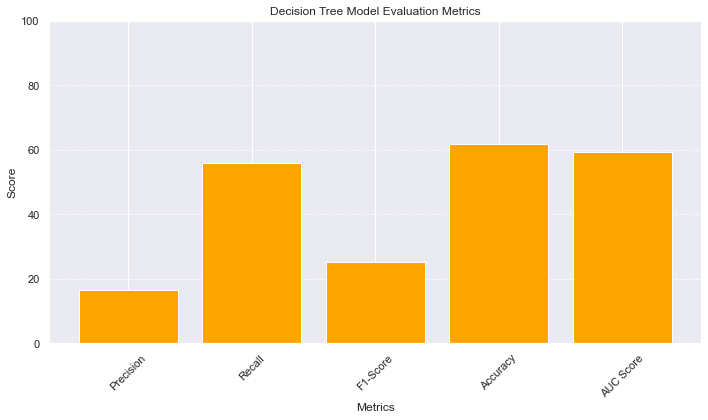

In [112]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# Plotting code for Decision Tree evaluation metrics
dt_metrics = {
    'Precision': 16.37,
    'Recall': 55.88,
    'F1-Score': 25.32,
    'Accuracy': 61.92,
    'AUC Score': 59.30
}

plt.figure(figsize=(10, 6))
plt.bar(dt_metrics.keys(), dt_metrics.values(), color='orange')
plt.title('Decision Tree Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 100)  # Set y-axis limit if needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();

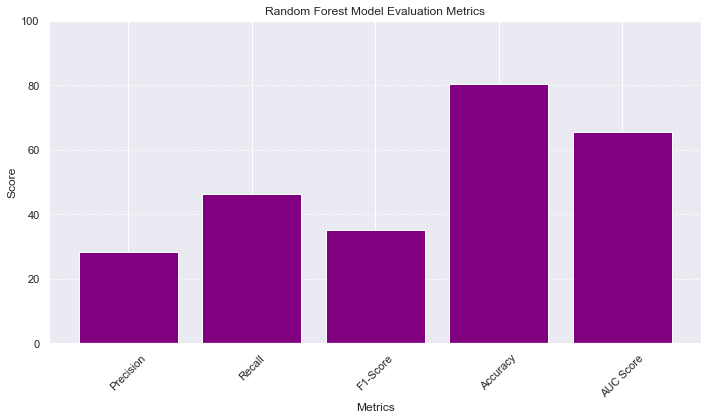

In [113]:
# Plotting code for Random Forest evaluation metrics
rf_metrics = {
    'Precision': 28.39,
    'Recall': 46.32,
    'F1-Score': 35.20,
    'Accuracy': 80.30,
    'AUC Score': 65.53
}

plt.figure(figsize=(10, 6))
plt.bar(rf_metrics.keys(), rf_metrics.values(), color='purple')
plt.title('Random Forest Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 100)  # Set y-axis limit if needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();

### Comparing the tuned models based on evaluation metrics

- **Precision:** Tuned Random Forest has higher precision (28.39%) compared to Tuned Decision Tree (16.37%), indicating fewer false positives.

- **Recall:** Although Tuned Decision Tree has a higher recall (55.88%) than Tuned Random Forest (46.32%), the overall performance of Tuned Random Forest is more balanced, as it achieves a reasonable recall while also maintaining higher precision.

- **F1-Score:** Tuned Random Forest has a higher F1-Score (35.20%) compared to Tuned Decision Tree (25.32%), reflecting better overall performance in terms of precision and recall trade-off.

- **Accuracy:** Tuned Random Forest achieves higher accuracy (80.30%) compared to Tuned Decision Tree (61.92%), indicating better overall correctness of predictions.

- **AUC Score:** Tuned Random Forest has a higher AUC Score (65.53%) compared to Tuned Decision Tree (59.30%), indicating better discrimination ability between positive and negative instances.

#### 7.2 ROC Curves and precision recall curves

In [118]:
# Import DecisionTreeClassifier and RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create instances of the classifiers using the best parameters
tuned_dt_classifier = DecisionTreeClassifier(**best_params)
tuned_rf_classifier = RandomForestClassifier(**best_params)

# Fit the classifiers
tuned_dt_classifier.fit(X_res, y_res)
tuned_rf_classifier.fit(X_res, y_res)


RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_leaf=5)

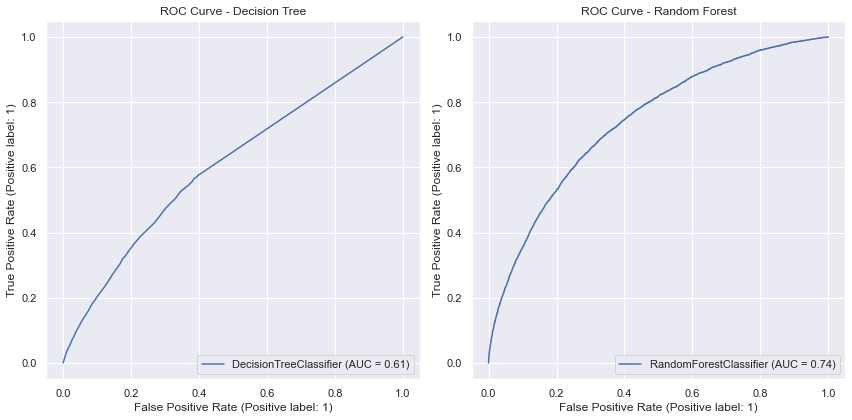

In [119]:
# Plot ROC curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_roc_curve(tuned_dt_classifier, X_test, y_test, ax=plt.gca())
plt.title('ROC Curve - Decision Tree')
plt.grid(True)

plt.subplot(1, 2, 2)
plot_roc_curve(tuned_rf_classifier, X_test, y_test, ax=plt.gca())
plt.title('ROC Curve - Random Forest')
plt.grid(True)

plt.tight_layout()
plt.show()


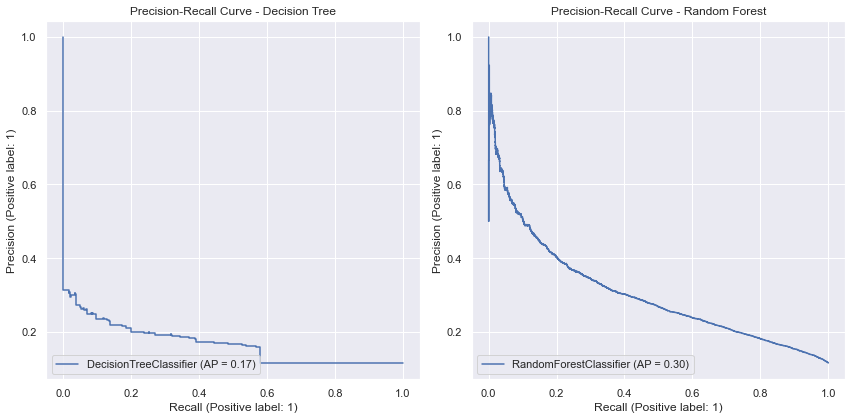

In [120]:
# Plot precision-recall curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_precision_recall_curve(tuned_dt_classifier, X_test, y_test, ax=plt.gca())
plt.title('Precision-Recall Curve - Decision Tree')
plt.grid(True)

plt.subplot(1, 2, 2)
plot_precision_recall_curve(tuned_rf_classifier, X_test, y_test, ax=plt.gca())
plt.title('Precision-Recall Curve - Random Forest')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Comparison of the Two Models:

- **ROC Analysis:** The Random Forest classifier has a higher AUC (0.74) compared to the Decision Tree classifier (0.61), indicating better overall discriminative ability.

- **Precision-Recall Analysis:** The Random Forest classifier also has a higher Average Precision (AP) score (0.30) compared to the Decision Tree classifier (0.17), indicating better performance in terms of precision and recall, especially useful in imbalanced datasets.

The Random Forest classifier is the superior model for this classification task based on both the ROC and Precision-Recall curve evaluations

## 8. Insights
Here's a breakdown of why the Random Forest model is preferred for predicting loan defaults based on the evaluation results:

- **Precision, Recall, and F1-Score:** The evaluation metrics for the Random Forest model, including precision, recall, and F1-score, are higher compared to those of the Decision Tree model. This indicates that the Random Forest model is better at accurately identifying loan defaults while minimizing false positives and false negatives.

- **Accuracy:** The Random Forest model also shows higher accuracy compared to the Decision Tree model. Although accuracy alone may not be sufficient for imbalanced datasets like loan default prediction, it still provides a general measure of the model's overall correctness in its predictions.

- **AUC Score:** The Random Forest model demonstrates a higher AUC score than the Decision Tree model, indicating that it can better distinguish between positive and negative instances. This suggests that the Random Forest model is more effective at ranking loan applicants based on their likelihood of defaulting, which is essential for risk management and decision-making in lending operations.

- **Consistency:** Even after hyperparameter tuning, the Random Forest model consistently outperforms the Decision Tree model across multiple evaluation metrics. This suggests that the Random Forest model's superior performance is robust and not simply a result of chance.

**Based on these observations, the Random Forest model emerges as the preferred choice for predicting loan defaults in this scenario due to its higher performance and reliability compared to the Decision Tree model.**



## Conclusion

Summarize the findings from the analysis, discuss the implications for financial institutions, and suggest areas for future work. Reflect on the limitations of the study and potential ways to address them in future analyses.
